# Két kép közti hasonlóság vizsgálata


In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

2022-03-25 08:55:20.175355: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-25 08:55:20.175385: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
generator = keras.models.load_model('datas/weights/generator.h5')

In [7]:
generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 1, 1, 100)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_transpose (Conv2DTranspo (None, 4, 4, 512)    819712      reshape[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 4, 4, 512)    2048        conv2d_transpose[0][0]           
______________________________________________________________________________________________

In [134]:
def denormalize_image(image):
    return (image.numpy() * 127.5 + 127.5).astype("uint32")

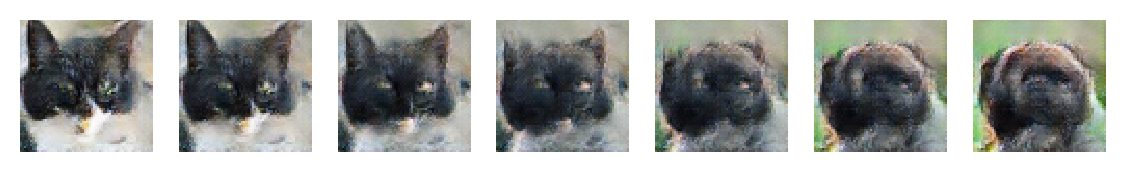

In [136]:
latent_dim = 100

from scipy.interpolate import interp1d
import numpy as np


noises = tf.random.normal([2, latent_dim])

res = []

step_size = 8
for i in range(1, len(noises)):
    linfit = interp1d([1, step_size], np.vstack([noises[i-1], noises[i]]), axis=0)
    
    for j in range(1,step_size):
        generated_image = generator(linfit(j).reshape(1,latent_dim), training=False)
        res.append(generated_image)
        
fig, axes = plt.subplots(figsize=(len(res), 1), nrows=1, ncols=len(res), dpi=200)

for i in range(len(res)):
    gen_1 = denormalize_image(res[i][0][0])
    axes[i].axis('off')
    axes[i].imshow(gen_1, interpolation='none')
plt.show()

In [138]:
print(f"L2 norm of first image: {np.linalg.norm(res[0][0][0])}")
print(f"L2 norm of last image: {np.linalg.norm(res[-1][0][0])}")

for image in res:
    print(np.linalg.norm(image[0][0].numpy().flatten(), 2))

L2 norm of first image: 61.223575592041016
L2 norm of last image: 50.046112060546875
61.223576
56.78108
52.650887
49.57649
48.891075
49.95065
50.046112


L2 távolság (Euklideszi távolság)
$$\sum_{i=0}^{n-1}\sqrt{(a_i-b_i)^2}$$

In [139]:
#print(np.linalg.norm(image1-image2))

for image in res:
    print(np.linalg.norm(res[3][0][0]-image[0][0]))

52.0055
39.204586
21.989561
0.0
17.7864
30.147547
38.216644
